In [1]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd

import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Merge METEDATA for old and new stations in MARCHE and add Abruzzo

In [2]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','stations','Italy_raingauges')

In [3]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 47.5, 'ITALY', 0.002

In [4]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [5]:
dir_in = os.path.join(dir_base, 'QC','METADATA','METADATA_INTENSE_UPDATE.csv')
METADATA_QC = pd.read_csv(dir_in)
METADATA_QC.head(2)

,File,ISO,Region,Code,Name,Elevatn,Or_EPSG,CRS_E,CRS_N,Lat,Lon,Yr_Strt,Yer_End,INTENSE,AGENCY,Source,TimeZon
0,IT-210_PIE-001030-900_0060_QCv1.csv,IT-210,Piedmont,PIE-001030-900,BORGOFRANCODIVREA,337.0,32632,410005.0,5040731.0,45.514302,7.847798,1988-05-08 05:00:00,2024-09-09 01:00:00,DT,ARPA Piemonte,Piedmont,UTC
1,IT-210_PIE-001097-900_0060_QCv1.csv,IT-210,Piedmont,PIE-001097-900,CUMIANA,327.0,32632,373092.0,4980177.0,44.963696,7.390821,1988-01-29 03:00:00,2024-09-18 12:00:00,DT,ARPA Piemonte,Piedmont,UTC


In [6]:
dir_in = os.path.join(dir_base,'NQC','Marche','1dy','METADATA','METADATA_MARCHE_3regions.csv')
METADATA_NEW = pd.read_csv(dir_in)
METADATA_NEW.head(2)

,File,ISO,Region,Code,Name,Elevation,Orig_EPSG,CRS_E,CRS_N,Lat,Lon,Year_Start,Year_End,INTENSE_Resp,AGENCY,Source,TimeZone
0,IT-570_1356_133_Umito_0060.csv,IT-570,Marche,1356,Umito,NaN,32632.0,NaN,NaN,42.74,13.41,2003-06-26,2025-08-29,AS,SIRMIP,Marche,UTC
1,IT-570_1364_134_Capodacqua_0060.csv,IT-570,Marche,2188,Capodacqua,NaN,32632.0,NaN,NaN,42.73,13.24,1951-01-01,2007-10-15,AS,SIRMIP,Marche,UTC


In [7]:
METADATA_MARCHE = pd.concat([METADATA_QC, METADATA_NEW])
METADATA_MARCHE = METADATA_MARCHE.sort_values(by="Region", ascending=True).reset_index(drop=True)
METADATA_MARCHE.head(3)

,File,ISO,Region,Code,Name,Elevatn,Or_EPSG,CRS_E,CRS_N,Lat,...,INTENSE,AGENCY,Source,TimeZon,Elevation,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone
0,IT-322_AA_6535_0060_QCv1.csv,IT-322,Alto-Adige,AA_6535,VANDOIESDISOPRA,746.0,32632.0,710057.0,5187849.0,46.811055,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1,IT-322_AA_5650_0060_QCv1.csv,IT-322,Alto-Adige,AA_5650,SELVADEIMOLINI,1141.0,32632.0,718972.0,5196967.0,46.890136,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
2,IT-322_AA_5690_0060_QCv1.csv,IT-322,Alto-Adige,AA_5690,MOLINIDITURES,851.0,32632.0,724491.0,5198298.0,46.900257,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN


## Load METADATA for ABRUZZO

In [8]:
dir_in = os.path.join(dir_base, 'NQC','METADATA','METADATA_INTENSE_NOQC_update.csv')
METADATA_NQC = pd.read_csv(dir_in)
METADATA_ABRUZZO = METADATA_NQC[METADATA_NQC['Region']=='Abruzzo']
METADATA_ABRUZZO.head(2)

,File,ISO,Region,Code,Name,Elevation,Orig_EPSG,CRS_E,CRS_N,Lat,Lon,Year_Start,Year_End,INTENSE_Resp,AGENCY,Source,TimeZone
0,IT-650_521_0060.csv,IT-650,Abruzzo,521,CASE INCILE,658.0,4326.0,4.650222e+06,371986.305502,41.993611,13.454444,2015-12-31 23:00:00,2023-12-31 23:00:00,"UK, DT",Civil Protection Abruzzo,Abruzzo,UTC
1,IT-650_537_0060.csv,IT-650,Abruzzo,537,GIULIANOVA,5.0,4326.0,4.736412e+06,414261.182915,42.775448,13.951911,2015-12-31 23:00:00,2023-12-31 23:00:00,"UK, DT",Civil Protection Abruzzo,Abruzzo,UTC


In [9]:
METADATA_ALL = pd.concat([METADATA_MARCHE, METADATA_ABRUZZO])
# METADATA_ALL = METADATA_ALL.sort_values(by="Region", ascending=True).reset_index(drop=True)
METADATA_ALL.head(3)

,File,ISO,Region,Code,Name,Elevatn,Or_EPSG,CRS_E,CRS_N,Lat,...,INTENSE,AGENCY,Source,TimeZon,Elevation,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone
0,IT-322_AA_6535_0060_QCv1.csv,IT-322,Alto-Adige,AA_6535,VANDOIESDISOPRA,746.0,32632.0,710057.0,5187849.0,46.811055,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1,IT-322_AA_5650_0060_QCv1.csv,IT-322,Alto-Adige,AA_5650,SELVADEIMOLINI,1141.0,32632.0,718972.0,5196967.0,46.890136,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN
2,IT-322_AA_5690_0060_QCv1.csv,IT-322,Alto-Adige,AA_5690,MOLINIDITURES,851.0,32632.0,724491.0,5198298.0,46.900257,...,UK,Provincia Autonoma di Bolzano,Alto-Adige,UTC,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
METADATA_ALL[METADATA_ALL['Region']=='Piedmont']

,File,ISO,Region,Code,Name,Elevatn,Or_EPSG,CRS_E,CRS_N,Lat,...,INTENSE,AGENCY,Source,TimeZon,Elevation,Orig_EPSG,Year_Start,Year_End,INTENSE_Resp,TimeZone
1925,IT-210_PIE-006001-900_0060_QCv1.csv,IT-210,Piedmont,PIE-006001-900,ACQUITERME,215.0,32632.0,458762.0,4947386.0,44.678658,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1926,IT-210_PIE-006136-900_0060_QCv1.csv,IT-210,Piedmont,PIE-006136-900,PONZONEBRICBERTON,773.0,32632.0,463371.0,4929557.0,44.518406,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1927,IT-210_PIE-006039-900_0060_QCv1.csv,IT-210,Piedmont,PIE-006039-900,CASALEMONFERRATO,136.0,32632.0,461009.0,4997760.0,45.132237,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1928,IT-210_PIE-006025-900_0060_QCv1.csv,IT-210,Piedmont,PIE-006025-900,CAPANNEDICOSOLA,1550.0,32632.0,515859.0,4946879.0,44.675103,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1929,IT-210_PIE-006022-900_0060_QCv1.csv,IT-210,Piedmont,PIE-006022-900,CAPANNEMARCAROLO,780.0,32632.0,481594.0,4934453.0,44.563178,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1930,IT-210_PIE-006003-900_0060_QCv1.csv,IT-210,Piedmont,PIE-006003-900,ALESSANDRIALOBBI,90.0,32632.0,476644.0,4976003.0,44.937076,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1931,IT-210_PIE-005104-900_0060_QCv1.csv,IT-210,Piedmont,PIE-005104-900,SEROLEBRICPUSCHERA,765.0,32632.0,441091.0,4934674.0,44.562994,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1932,IT-210_PIE-001030-900_0060_QCv1.csv,IT-210,Piedmont,PIE-001030-900,BORGOFRANCODIVREA,337.0,32632.0,410005.0,5040731.0,45.514302,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1933,IT-210_PIE-005074-900_0060_QCv1.csv,IT-210,Piedmont,PIE-005074-900,MONTALDOSCARAMPI,295.0,32632.0,441425.0,4964255.0,44.829299,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN
1934,IT-210_PIE-005075-900_0060_QCv1.csv,IT-210,Piedmont,PIE-005075-900,MONTECHIARODASTI,200.0,32632.0,429159.0,4984125.0,45.007036,...,DT,ARPA Piemonte,Piedmont,UTC,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dir_out = os.path.join(dir_base, 'QC_MIX','METADATA','METADATA_INTENSE_UPDATE.csv')
METADATA_ALL.to_csv(dir_out, header=True, index=False)

/tmp/ipykernel_16248/1595445419.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(regions_unique))  # paleta con N colores


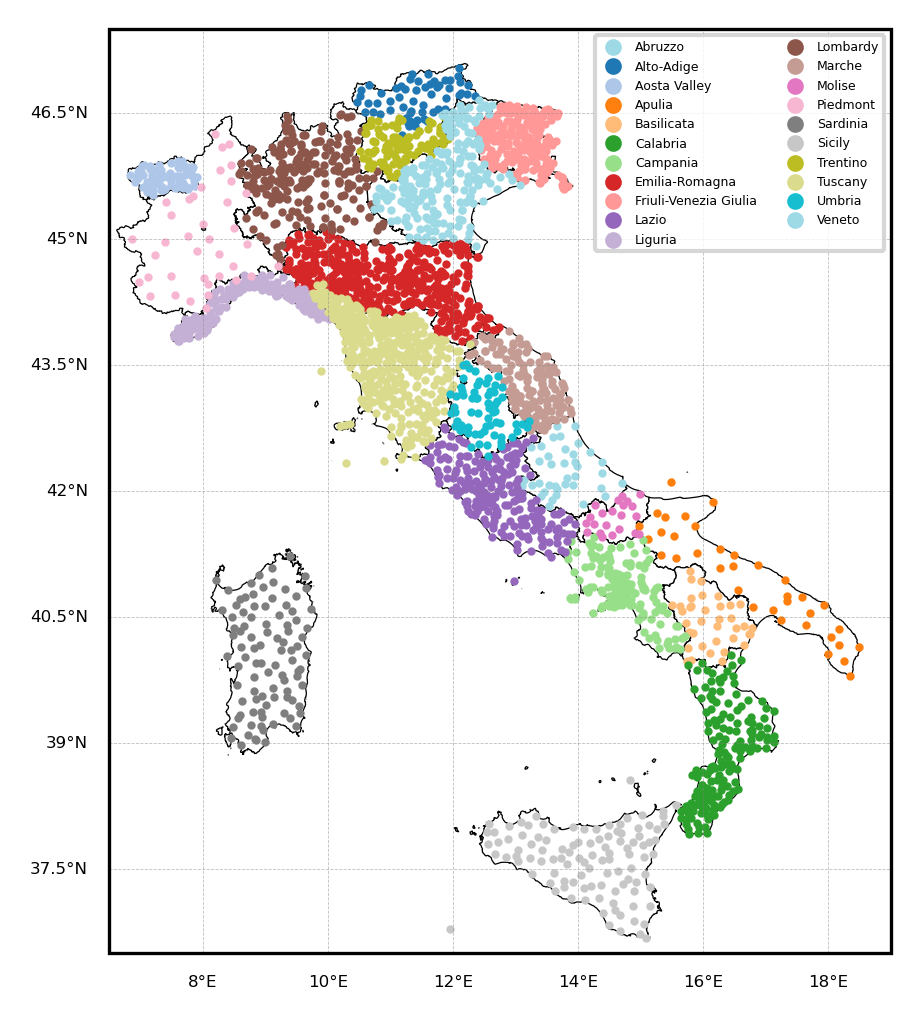

In [11]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4), dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

# Mapa base
im = REGIONS.plot(legend=False, color='white', edgecolor="black", linewidth=0.3, ax=ax1)

# Gridlines
gl = ax1.gridlines(crs=proj, draw_labels=True, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# ================================================================
# Crear un mapa de colores por región
regions_unique = METADATA_ALL["Region"].unique()
cmap = cm.get_cmap("tab20", len(regions_unique))  # paleta con N colores
colors = {region: cmap(i) for i, region in enumerate(regions_unique)}

# Plot con color por región
for region, group in METADATA_ALL.groupby("Region"):
    ax1.scatter(
        group["Lon"], group["Lat"],
        color=colors[region], s=1, label=region
    )

# ================================================================
# Leyenda
ax1.legend(markerscale=3, fontsize=3, loc="upper right", ncol=2)